In [2]:
import numpy as np 
import os 
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import keras
from keras import layers,models,regularizers


2024-11-13 09:51:09.390508: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import sys
import os

module_path = "/Users/bastienduboeuf/Documents/Recherche/MLForFlatDirections3D/MLFlatDirections"
sys.path.append(module_path)

import potentials as pot
import utils

In [6]:
x13d = np.load('../x_V13d_x13eq0.npy')

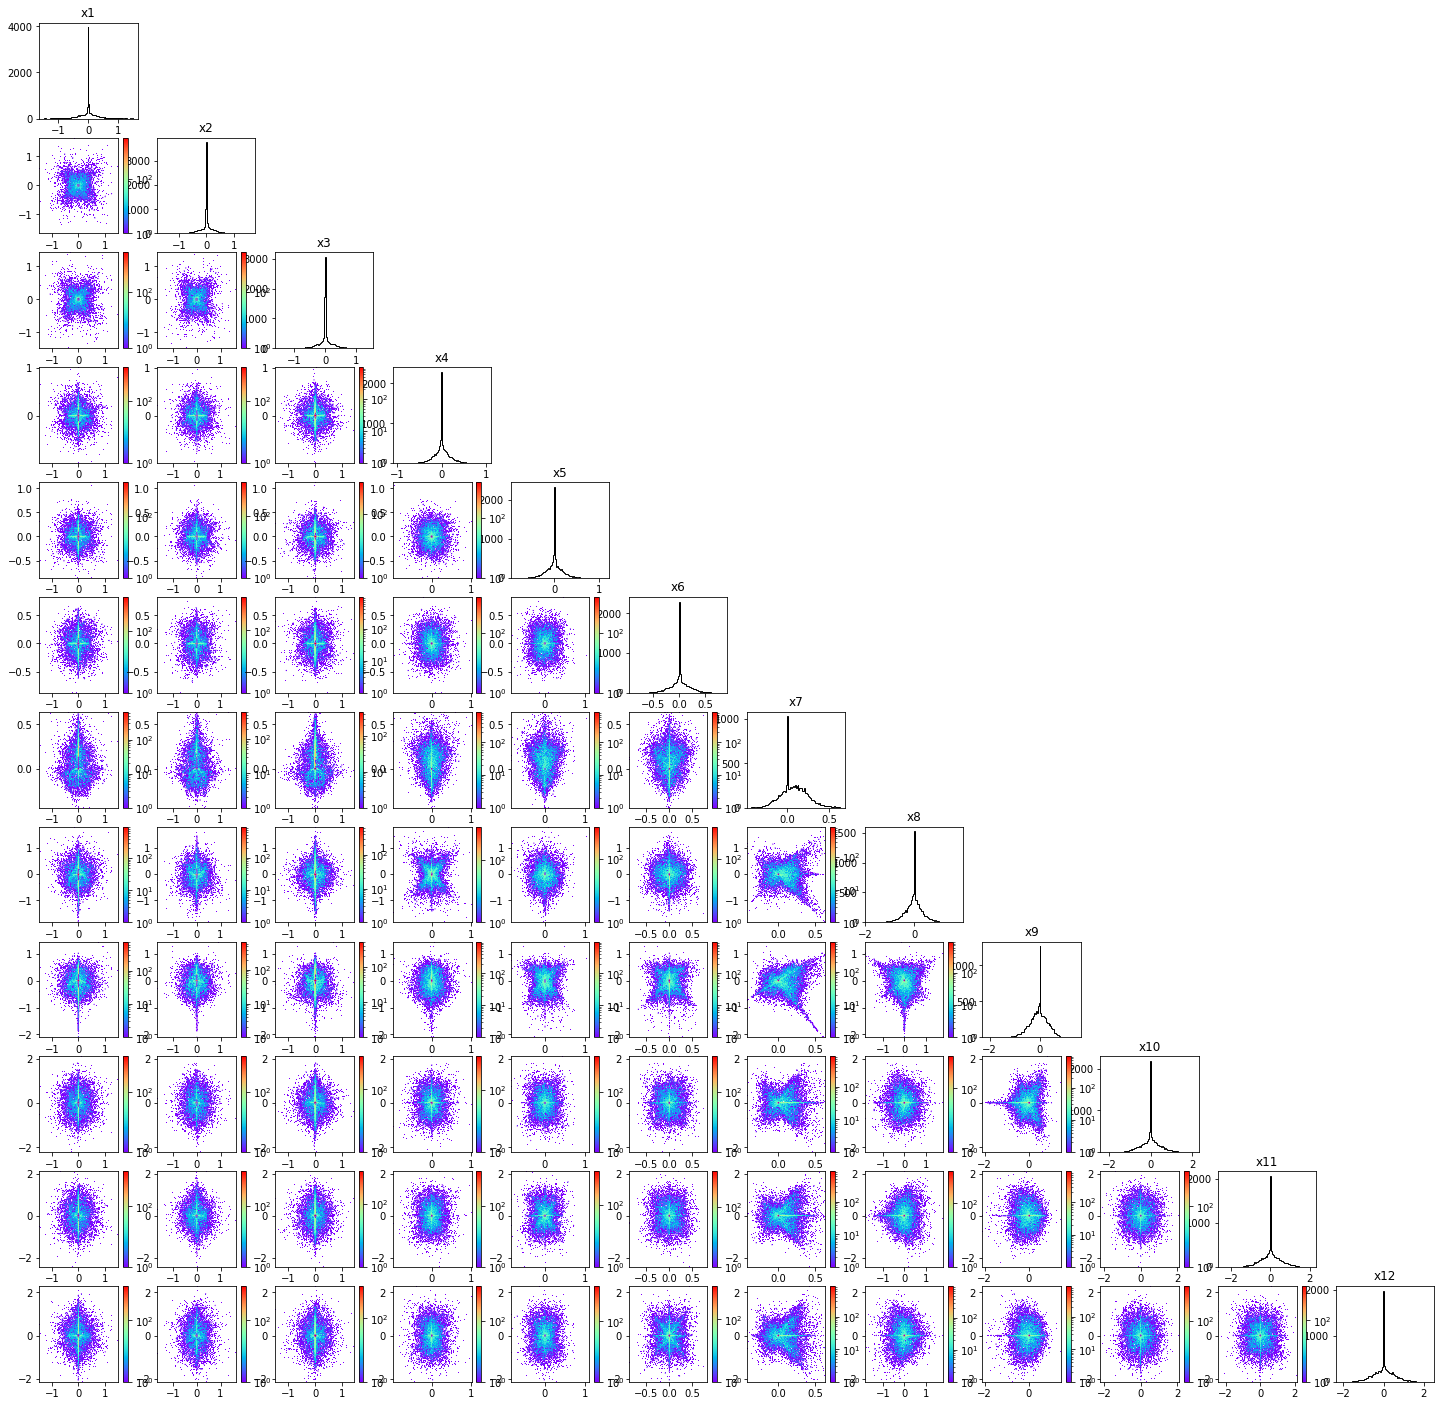

In [8]:
utils.triangular_plot(x13d)

In [38]:
list_hist_loss=[]
list_hist_val_loss=[]
for i in range(12):
    list_hist_loss.append(np.load('autoencoder_1024_'+str(i+1)+'_10000hist.npy',allow_pickle=True).item().history["loss"])
    list_hist_val_loss.append(np.load('autoencoder_1024_'+str(i+1)+'_10000hist.npy',allow_pickle=True).item().history["val_loss"])
    

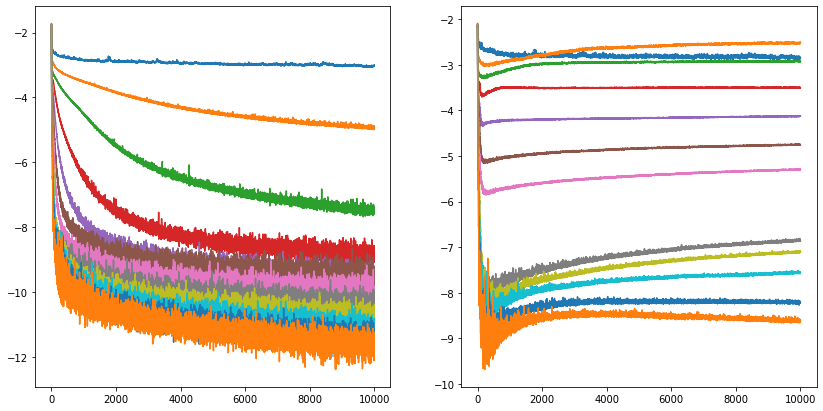

In [40]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
for i in range(12):
    ax.plot(np.log(list_hist_loss[i]))
    ax1.plot(np.log(list_hist_val_loss[i]))
plt.show()


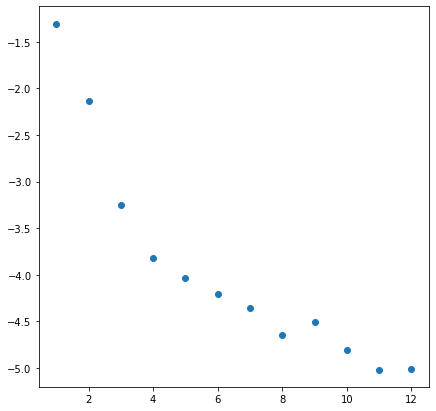

In [50]:
plt.figure(figsize=(7,7))
plt.scatter(np.linspace(1,12,12),np.log([list_hist_loss[k][-1] for k in range(12)])/np.log(10))
plt.show()

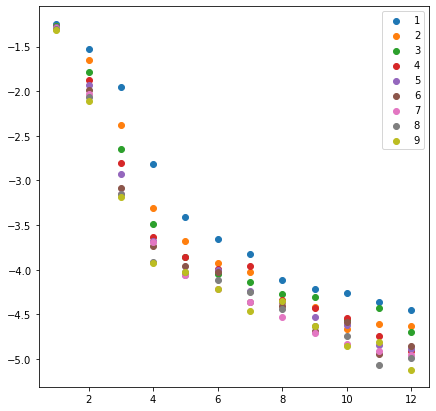

In [51]:
plt.figure(figsize=(7,7))
for i in range(1,10):
    plt.scatter(np.linspace(1,12,12),np.log([list_hist_loss[k][i*1000] for k in range(12)])/np.log(10),label=i)
plt.legend()
plt.show()


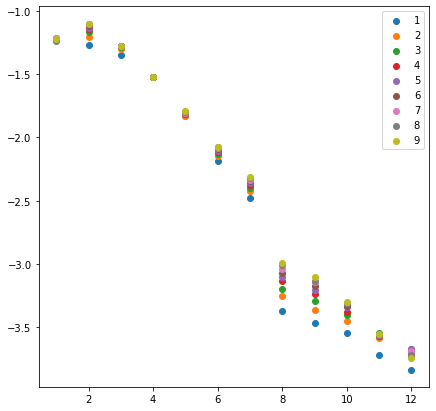

In [52]:
plt.figure(figsize=(7,7))
for i in range(1,10):
    plt.scatter(np.linspace(1,12,12),np.log([list_hist_val_loss[k][i*1000] for k in range(12)])/np.log(10),label=i)
plt.legend()
plt.show()
